In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":64.18,"feels_like":64.11,"temp_min":58.35,"temp_max":68,"pressure":1013,"humidity":81},"visibility":10000,"wind":{"speed":4,"deg":290,"gust":8.01},"clouds":{"all":5},"dt":1663217016,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1663237452,"sunset":1663282496},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 64.18,
  'feels_like': 64.11,
  'temp_min': 58.35,
  'temp_max': 68,
  'pressure': 1013,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 290, 'gust': 8.01},
 'clouds': {'all': 5},
 'dt': 1663217016,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1663237452,
  'sunset': 1663282496},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 64.18,
  'feels_like': 64.11,
  'temp_min': 58.35,
  'temp_max': 68,
  'pressure': 1013,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 290, 'gust': 8.01},
 'clouds': {'all': 5},
 'dt': 1663217016,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1663237452,
  'sunset': 1663282496},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data.
boston_data = city_weather.json()

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 68 81 5 4


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-09-15 04:43:36'

In [20]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | shingu
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | ayan
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | contamana
Processing Record 8 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 9 of Set 1 | poum
Processing Record 10 of Set 1 | sakaiminato
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | port hardy
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | andenes
Processing Record 22 of Set 1 | sal 

Processing Record 39 of Set 4 | te anau
Processing Record 40 of Set 4 | paeroa
Processing Record 41 of Set 4 | ponta do sol
Processing Record 42 of Set 4 | port keats
Processing Record 43 of Set 4 | ranfurly
Processing Record 44 of Set 4 | constitucion
Processing Record 45 of Set 4 | kiruna
Processing Record 46 of Set 4 | vao
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | solnechnyy
Processing Record 49 of Set 4 | nantucket
Processing Record 50 of Set 4 | mount gambier
Processing Record 1 of Set 5 | broken hill
Processing Record 2 of Set 5 | whitianga
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | pedernales
Processing Record 5 of Set 5 | verkhoyansk
Processing Record 6 of Set 5 | atambua
Processing Record 7 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 8 of Set 5 | nanortalik
Processing Record 9 of Set 5 | jiuquan
Processing Record 10 of Set 5 | sao joao da barra
Processing Record 11 of Set 5 | kieta
Processing Record

Processing Record 29 of Set 8 | lumeje
Processing Record 30 of Set 8 | virden
Processing Record 31 of Set 8 | mugur-aksy
Processing Record 32 of Set 8 | oranjestad
Processing Record 33 of Set 8 | boysun
Processing Record 34 of Set 8 | port blair
Processing Record 35 of Set 8 | tomatlan
Processing Record 36 of Set 8 | alice springs
Processing Record 37 of Set 8 | temaraia
City not found. Skipping...
Processing Record 38 of Set 8 | codrington
Processing Record 39 of Set 8 | dalvik
Processing Record 40 of Set 8 | dunedin
Processing Record 41 of Set 8 | vanimo
Processing Record 42 of Set 8 | gobabis
Processing Record 43 of Set 8 | smithers
Processing Record 44 of Set 8 | caravelas
Processing Record 45 of Set 8 | lazarev
Processing Record 46 of Set 8 | artigas
Processing Record 47 of Set 8 | kirovsk
Processing Record 48 of Set 8 | huilong
Processing Record 49 of Set 8 | arawa
Processing Record 50 of Set 8 | ostrov
Processing Record 1 of Set 9 | pasni
Processing Record 2 of Set 9 | palamos
P

City not found. Skipping...
Processing Record 19 of Set 12 | san juan
Processing Record 20 of Set 12 | shitanjing
Processing Record 21 of Set 12 | lar
Processing Record 22 of Set 12 | youkounkoun
Processing Record 23 of Set 12 | bubaque
Processing Record 24 of Set 12 | dafeng
Processing Record 25 of Set 12 | maldonado
Processing Record 26 of Set 12 | villamontes
Processing Record 27 of Set 12 | volchikha
Processing Record 28 of Set 12 | vaasa
Processing Record 29 of Set 12 | nara
Processing Record 30 of Set 12 | tulun
Processing Record 31 of Set 12 | whitehorse
Processing Record 32 of Set 12 | araouane
Processing Record 33 of Set 12 | akyab
Processing Record 34 of Set 12 | fort nelson
Processing Record 35 of Set 12 | aswan
Processing Record 36 of Set 12 | tchaourou
Processing Record 37 of Set 12 | yar-sale
Processing Record 38 of Set 12 | khani
Processing Record 39 of Set 12 | honningsvag
Processing Record 40 of Set 12 | caconda
Processing Record 41 of Set 12 | surt
Processing Record 4

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shingu,33.7333,135.9833,80.78,68,90,12.37,JP,2022-09-15 04:52:12
1,Castro,-24.7911,-50.0119,54.25,98,99,4.85,BR,2022-09-15 04:45:01
2,Ayan,56.4500,138.1667,51.53,54,2,19.15,RU,2022-09-15 04:52:13
3,Vaini,-21.2000,-175.2000,80.76,78,75,6.91,TO,2022-09-15 04:44:57
4,Busselton,-33.6500,115.3333,61.12,64,68,16.20,AU,2022-09-15 04:46:15
...,...,...,...,...,...,...,...,...,...
548,Kinango,-4.1372,39.3153,72.88,82,35,8.52,KE,2022-09-15 05:06:33
549,Ryotsu,38.0833,138.4333,76.53,69,100,2.77,JP,2022-09-15 05:06:33
550,La Rioja,42.2500,-2.5000,56.98,71,80,4.18,ES,2022-09-15 05:06:34
551,Cairns,-16.9167,145.7667,88.07,61,20,12.66,AU,2022-09-15 05:06:34


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shingu,JP,2022-09-15 04:52:12,33.7333,135.9833,80.78,68,90,12.37
1,Castro,BR,2022-09-15 04:45:01,-24.7911,-50.0119,54.25,98,99,4.85
2,Ayan,RU,2022-09-15 04:52:13,56.4500,138.1667,51.53,54,2,19.15
3,Vaini,TO,2022-09-15 04:44:57,-21.2000,-175.2000,80.76,78,75,6.91
4,Busselton,AU,2022-09-15 04:46:15,-33.6500,115.3333,61.12,64,68,16.20
...,...,...,...,...,...,...,...,...,...
548,Kinango,KE,2022-09-15 05:06:33,-4.1372,39.3153,72.88,82,35,8.52
549,Ryotsu,JP,2022-09-15 05:06:33,38.0833,138.4333,76.53,69,100,2.77
550,La Rioja,ES,2022-09-15 05:06:34,42.2500,-2.5000,56.98,71,80,4.18
551,Cairns,AU,2022-09-15 05:06:34,-16.9167,145.7667,88.07,61,20,12.66


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

In [26]:
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields form the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

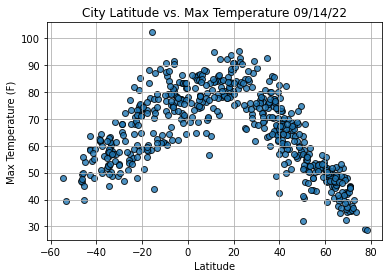

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

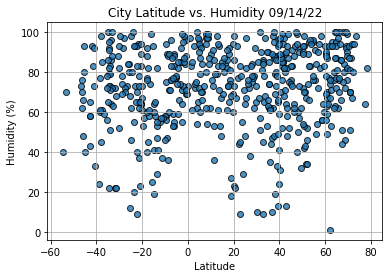

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

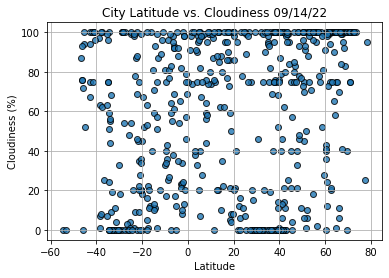

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

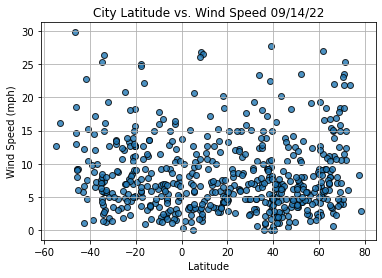

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                  Yellowknife
Country                        CA
Date          2022-09-15 04:45:39
Lat                        62.456
Lng                     -114.3525
Max Temp                    50.56
Humidity                       71
Cloudiness                     20
Wind Speed                   5.75
Name: 13, dtype: object

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shingu,JP,2022-09-15 04:52:12,33.7333,135.9833,80.78,68,90,12.37
2,Ayan,RU,2022-09-15 04:52:13,56.4500,138.1667,51.53,54,2,19.15
7,Sakaiminato,JP,2022-09-15 04:52:14,35.5500,133.2333,84.13,74,75,14.97
9,Barrow,US,2022-09-15 04:45:09,71.2906,-156.7887,35.62,87,100,25.32
11,Qaqortoq,GL,2022-09-15 04:50:15,60.7167,-46.0333,46.71,70,12,2.77


In [40]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shingu,JP,2022-09-15 04:52:12,33.7333,135.9833,80.78,68,90,12.37
2,Ayan,RU,2022-09-15 04:52:13,56.4500,138.1667,51.53,54,2,19.15
7,Sakaiminato,JP,2022-09-15 04:52:14,35.5500,133.2333,84.13,74,75,14.97
9,Barrow,US,2022-09-15 04:45:09,71.2906,-156.7887,35.62,87,100,25.32
11,Qaqortoq,GL,2022-09-15 04:50:15,60.7167,-46.0333,46.71,70,12,2.77


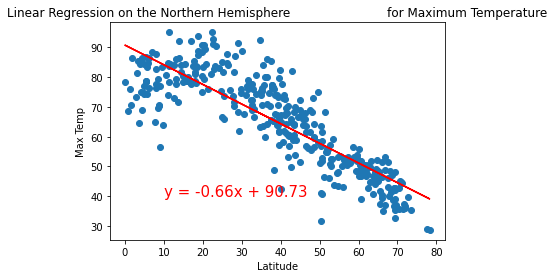

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

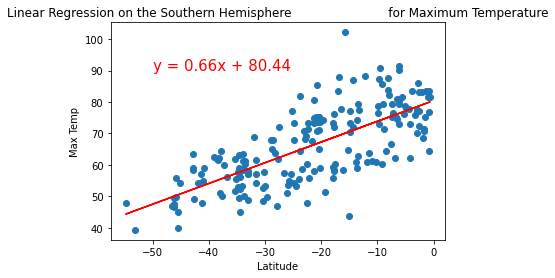

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

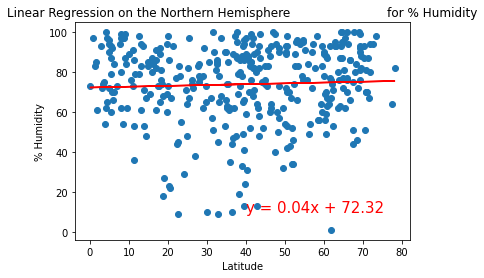

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

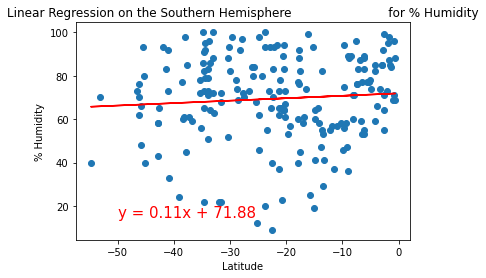

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

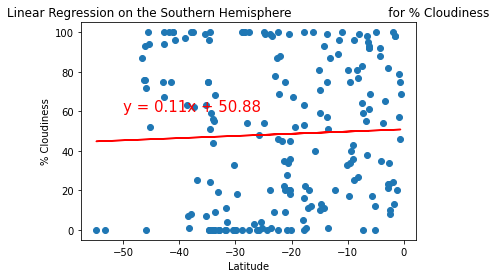

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

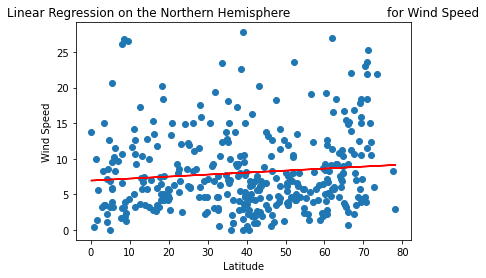

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

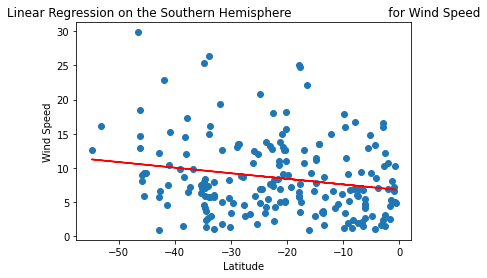

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))